# Part 3.6 - Model Comparison

## Impact of Model Size

In [1]:
num_parameters = {
    "t5-base": 223_495_682,
    "t5-small": 60_770_306,
    "roberta": 124_647_170,
    "gpt2": 124_441_344,
    "cnn": 4_980_802,  # based on our best cnn config
    "rnn": 4_934_090,  # based on our best rnn config
    "bilstm": 5_373_674,  # based on our best bilstm config
    "bigru": 4_985_290,  # based on our best bigru config
}

test_acc = {
    "t5-base": 88.27,
    "t5-small": 84.24,
    "roberta": 88.18,
    "gpt2": 85.37,
    "cnn": 78.89,  # based on our best cnn config
    "rnn": 80.30,  # based on our best rnn config
    "bilstm": 78.33,  # based on our best bilstm config
    "bigru": 79.83,  # based on our best bigru config
}

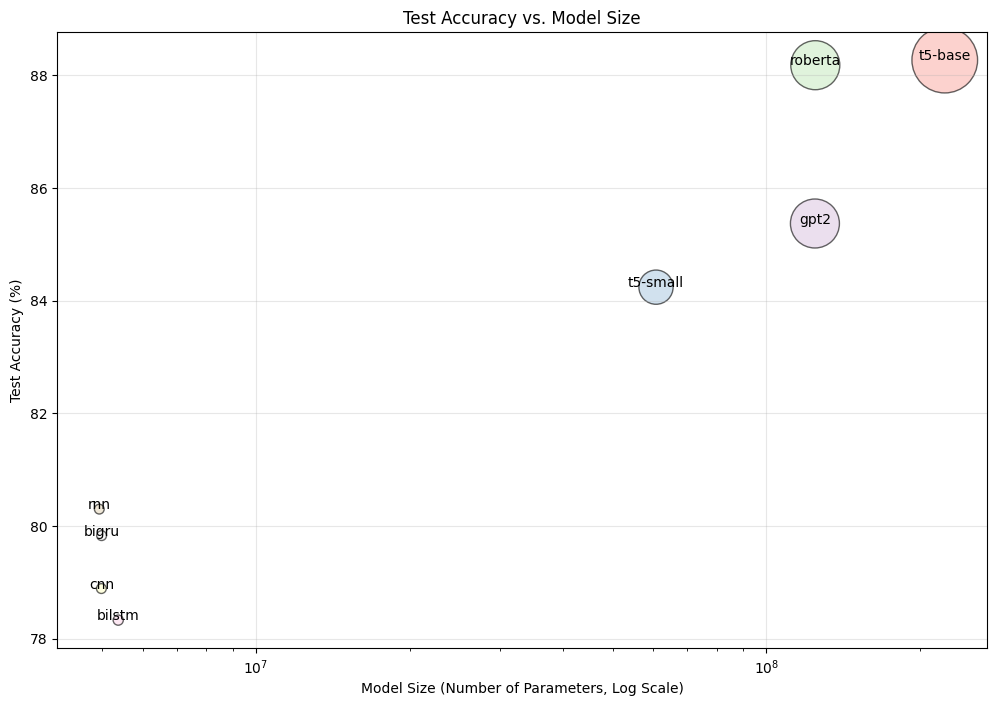

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
model_names = list(num_parameters.keys())
model_sizes = [num_parameters[model] for model in model_names]
test_accuracies = [test_acc[model] for model in model_names]

# Scale bubble sizes up for better visibility
bubble_sizes = [size / 100_000 for size in model_sizes]  # Increase scaling factor

# Use a pastel color map for better color differentiation
colors = plt.cm.Pastel1(np.linspace(0, 1, len(model_names)))

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(
    model_sizes,
    test_accuracies,
    s=bubble_sizes,
    alpha=0.6,
    c=colors,
    edgecolors="k",
    linewidth=1,
)
plt.xscale("log")
plt.yscale("linear")
# plt.ylim(75, 100)

# Labeling the axes
plt.xlabel("Model Size (Number of Parameters, Log Scale)")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy vs. Model Size")

# Annotate each point with model names
for i, model in enumerate(model_names):
    plt.annotate(
        model,
        (model_sizes[i], test_accuracies[i]),
        textcoords="offset points",
        xytext=(0, 0),
        ha="center",
    )

plt.grid(True, alpha=0.3)
plt.show()

## Transformers Model Architecture

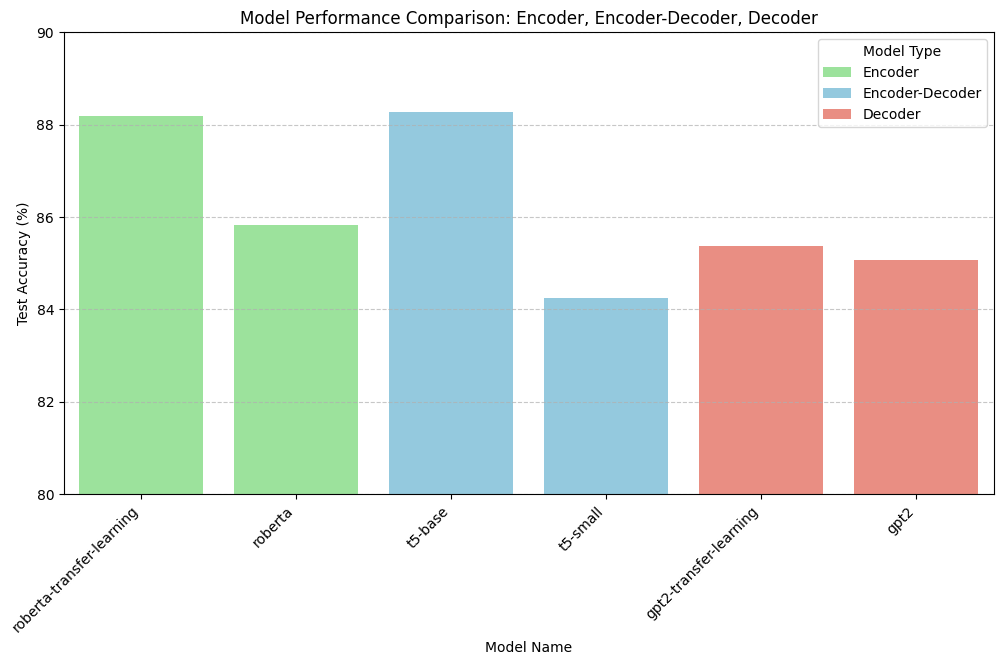

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

test_acc = {
    "t5-base": 88.27,
    "t5-small": 84.24,
    "roberta-transfer-learning": 88.18,
    "roberta": 85.834,
    "gpt2-transfer-learning": 85.37,
    "gpt2": 85.08,
}

encoder_decoder = ["t5-base", "t5-small"]
encoder = ["roberta-transfer-learning", "roberta"]
decoder = ["gpt2-transfer-learning", "gpt2"]

model_names = encoder + encoder_decoder + decoder
model_accuracies = [test_acc[model] for model in model_names]

group_labels = (
    ["Encoder"] * len(encoder)
    + ["Encoder-Decoder"] * len(encoder_decoder)
    + ["Decoder"] * len(decoder)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=model_names,
    y=model_accuracies,
    hue=group_labels,
    dodge=False,
    palette=["lightgreen", "skyblue", "salmon"],
)

plt.xlabel("Model Name")
plt.ylabel("Test Accuracy (%)")
plt.title("Model Performance Comparison: Encoder, Encoder-Decoder, Decoder")
plt.ylim(80, 90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Model Type")

plt.show()